Name:Venkata Avinash Paturu
RUID: 182003874

# Importing Necessary Libraries

In [105]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
# For preprocessing the data
from sklearn.preprocessing import Imputer
from sklearn import preprocessing
# To split the dataset into train and test datasets
from sklearn.cross_validation import train_test_split
# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score
#from preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

lreg = LinearRegression()



### Reading Data

In [106]:
data=pd.read_csv('mushrooms.csv')
print(data.head())

  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color   ...   stalk-surface-below-ring  \
0            c         n          k   ...                          s   
1            c         b          k   ...                          s   
2            c         b          n   ...                          s   
3            c         n          n   ...                          s   
4            w         b          k   ...                          s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p     

### Checking for NA's in values
if there are none move on if there are NA's replace with mode of the column

In [107]:
print(data.groupby(['class']).count())
print(data.isnull().sum())

       cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
class                                                                      
e           4208         4208       4208     4208  4208             4208   
p           3916         3916       3916     3916  3916             3916   

       gill-spacing  gill-size  gill-color  stalk-shape   ...     \
class                                                     ...      
e              4208       4208        4208         4208   ...      
p              3916       3916        3916         3916   ...      

       stalk-surface-below-ring  stalk-color-above-ring  \
class                                                     
e                          4208                    4208   
p                          3916                    3916   

       stalk-color-below-ring  veil-type  veil-color  ring-number  ring-type  \
class                                                                          
e                        

Preprocessing data to convert caterogical attributes to numerical attributes
using minmax scaler for relative normalization
Althought The scaling dosent effect much for graphic model's like NB and LDA its still good to use scaling

In [108]:
data = data.apply(preprocessing.LabelEncoder().fit_transform)
print(data.head())
data.values[:,1:]=MinMaxScaler().fit_transform(data.values[:,1:])
print(data.head())

   class  cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0      1          5            2          4        1     6                1   
1      0          5            2          9        1     0                1   
2      0          0            2          8        1     3                1   
3      1          5            3          8        1     6                1   
4      0          5            2          3        0     5                1   

   gill-spacing  gill-size  gill-color   ...     stalk-surface-below-ring  \
0             0          1           4   ...                            2   
1             0          0           4   ...                            2   
2             0          0           5   ...                            2   
3             0          1           5   ...                            2   
4             1          0           4   ...                            2   

   stalk-color-above-ring  stalk-color-below-ring  veil-type  

/Users/avinash2don/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


### Loop to classify the data with two classifiers based on same test and train split generated ny Kfold

In [109]:
NB = GaussianNB()
LDA = LinearDiscriminantAnalysis()



NBdic={}
LDAdic={}
for i in range(6,31):
    kf = KFold(n_splits=i,random_state=9)
    sumNB = 0
    sumLDA = 0
    for train, test in kf.split(data):
        train_data = np.array(data)[train]
        test_data = np.array(data)[test]
        features_train= train_data[:,1:]
        target_train= train_data[:,0]
        features_test= test_data[:,1:]
        target_test= test_data[:,0]
        NB.fit(features_train, target_train)
        target_predNB = NB.predict(features_test)
        sumNB += accuracy_score(target_test, target_predNB, normalize = True)
        LDA.fit(features_train, target_train)
        target_predLDA = LDA.predict(features_test)
        sumLDA += accuracy_score(target_test, target_predLDA, normalize = True)
    averageNB = sumNB/i
    averageLDA = sumLDA/i
    NBdic.update({i:averageNB})
    LDAdic.update({i:averageLDA})
    

/Users/avinash2don/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


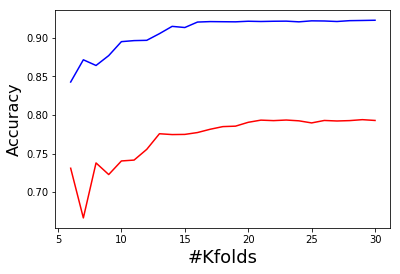

In [110]:
listsNB = sorted(NBdic.items()) # sorted by key, return a list of tuples
listsLDA = sorted(LDAdic.items()) # sorted by key, return a list of tuples

x, y = zip(*listsNB) # unpack a list of pairs into two tuples
x1, y1 = zip(*listsLDA)

plt.plot(x, y,'r')
plt.plot(x1, y1,'b')
plt.xlabel('#Kfolds', fontsize=18)
plt.ylabel('Accuracy', fontsize=16)
plt.show()


LDA is most usefull on continuous variables where as NB is useful for categorical variables, as i used scaling LDA considered the minor nuances in the attributes and gave me good accuracy compared to NB classifier. On other hand due increased size of training set helped both the models perform better with increased Kfolds.